In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_csv('L0001.csv')
#df.describe()

In [218]:
def z_test(sample, pop_mean, alpha=0.05):
    # Calculate sample mean and standard error
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # ddof=1 for sample standard deviation
    n = len(sample_data)
    
    # Calculate z-score
    z = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))
    
    # Calculate p-value
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))  # two-tailed test
    
    # Determine significance
    if p_value < alpha:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
 
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.title('Z-test')
    plt.axvline(x=z, color='r', linestyle='--', label=f'z = {z:.2f}, p = {p_value:.4f}')
    plt.legend()
    plt.show()

    #still working on graph ^^

    #return z, p_value, result
    print(f' z: {z.round(4)}, p: {p_value.round(4)}, Result: {result}')

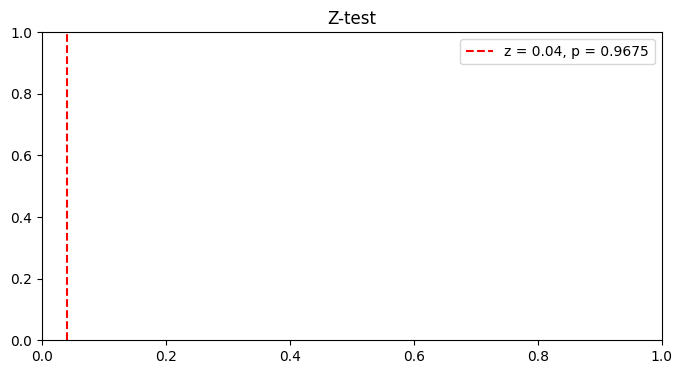

 z: 0.0408, p: 0.9675, Result: Fail to reject null hypothesis


In [219]:
z_test(df['MPArea'], 365, 0.05) 
#if the p value is 1 that means that the sample means in two groups are identical
#z value 

In [220]:
def chi_squared_test(observed, expected):

    
    chi2, p, dof, expected = chi2_contingency(observed)
        
    #plot
    categories = observed.shape[0]
    plt.figure(figsize=(8, 5))
    plt.bar(np.arange(categories)-0.2, observed, width=0.4, label='Observed', color='b', align='center')
    plt.bar(np.arange(categories)+0.2, expected, width=0.4, label='Expected', color='g', align='center')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title('Observed vs. Expected Counts')
    plt.xticks(np.arange(categories), np.arange(categories))
    plt.legend()
    plt.tight_layout()
    plt.show()

    #work in progress

    print(f'Chi-squared Statistic: {chi2}, p: {p}')


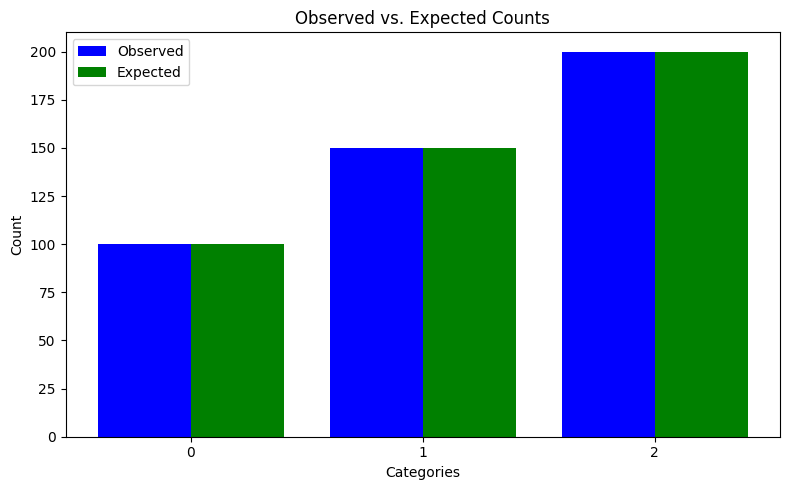

Chi-squared Statistic: 0.0, p: 1.0


In [221]:

observed = np.array([100, 150, 200])  #test values observed
expected = np.array([89, 130, 211])  #test values expected

chi_squared_test(observed, expected)


In [3]:
def t_test(sample1, sample2, alpha=0.05):
    
    #t-test
    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    
    #check if its significant or not
    if p_value < alpha:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"
    
    # Plot
    plt.figure(figsize=(8, 4))
    plt.title('T-test')
    plt.hist(sample1, alpha=0.5, label='Sample 1', bins=10)
    plt.hist(sample2, alpha=0.5, label='Sample 2', bins=10)
    plt.legend()
    plt.show()
    
    #return t_stat, p_value, result
    print(f' t_stat: {t_stat.round(4)}, p: {p_value.round(4)}, Result: {result}')

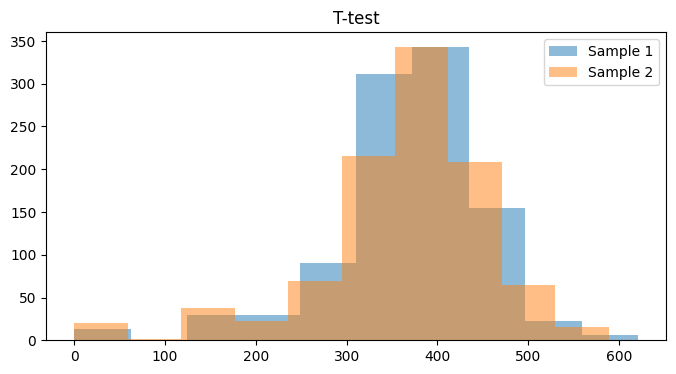

 t_stat: 1.3824, p: 0.167, Result: Fail to reject null hypothesis


In [13]:
t_test(df['MPArea'].sample(n=1000), df['MPArea'].sample(n=1000), 0.05) 
#PARAMETERS - 
#1 - sample data 1 
#2 - sample data 2
#3 - alpha value

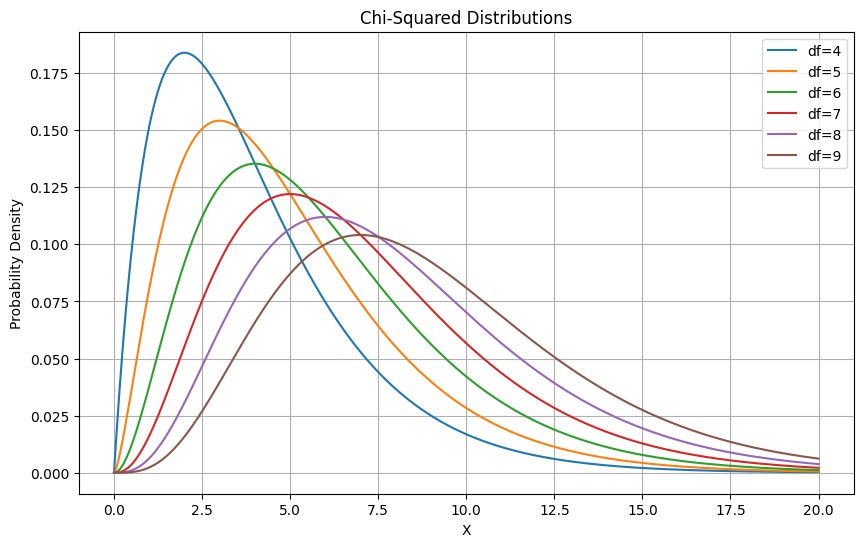

In [6]:


# Define degrees of freedom for each distribution
dfs = [4, 5, 6, 7, 8, 9]

plt.figure(figsize=(10, 6))

# Plot each chi-squared distribution
for df in dfs:
    x = np.linspace(0, 20, 1000)  # range of x values for plotting
    pdf = chi2.pdf(x, df)  # probability density function values
    plt.plot(x, pdf, label=f'df={df}')

plt.title('Chi-Squared Distributions')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
